# Example: Optimal stopping of fractional Brownian motion

In this notebook we present how to use the code from https://github.com/lucapelizzari/Optimal_Stopping_with_signatures/tree/main to compute lower and upper bounds for the optimal stopping value of fractional Brownian motion.


## Step 1: Import packages 

The iisignature package is used to compute the path-signature, and the gurobi package will be applied to solve efficiently solve high-dimensional linear programs. A license from the latter is required, and one can obtain a free-license on https://www.gurobi.com/academia/academic-program-and-licenses/.

In [1]:
!pip install iisignature
!pip install gurobipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 11.0 MB/s eta 0:00:0000:0100:01


## Step 2: Define parameters for the optimal stopping problem

Recall from Section 4.1 in the paper, that we wish to solve the problem $$\sup_{\tau\in \mathcal{S}_0^N}\mathbb{E}(X^H_{\tau}),$$ where $X$ is a fractional Brownian motion with Hurst parameter $H\in (0,1)$, and we maximize over stopping times on $0=t_0<\dots<t_{100}=1$. In both the primal and dual formulation, we approximate the solution using $K$-step signature lifts of the paths $t \mapsto (t,X_t^H)$. In the following we specify all the parameters.

In [58]:
K_primal = 4 #Signature trunctation
K_dual = 4
N = 100 #number of stopping dates
J = 100 #discretization-grid for computing the siganture (that is iterated integrals)
H = 0.3 #Hurst Parameter
T = 1 #Final time
M1_primal = 50000 #number of samples for the Longstaff-Schwartz procedure
M2_primal = 50000 #number of samples for independent resimulation to get lower-bounds
M1_dual = 4000 #number of samples for the SAA dual procedure
M2_dual = 50000 #number of samples for independent resimulation to get lower-bounds


The file Optimal_Stopping_fBM_Signatures.py contains the functions to compute lower and upper-bounds

In [93]:
from Optimal_Stopping_fBM_Signatures import LongstaffSchwartz_signature_fBm, DualSAA_signature_fBm

## Step 3: Compute lower bounds

The function LongstaffSchwartz_signature_fBm computes (true) lower bounds, by first solving the Longstaff-Schwartz algorithm with signatures described in Section 3.2 of the paper, using M1_primal samples, which returns linear functionals of the truncated signature at each exercise date (approxmation for continuation values). By independently resimulating M2_primal paths and their signature, the function uses the stopping policies for each path to decide the optimal stopping point, and then averaging over all samples gives a true lower bounds the the problem.

In [94]:
y_lowerbound,stopping_policies,run_time_primal = LongstaffSchwartz_signature_fBm(M1_primal,M2_primal,J,N,T,K_primal,H)

0.9410866509579381
0.9258706774690898
0.9099605284570111
0.8943411363649209
0.8797985637858886
0.8653248783358526
0.8515416169188054
0.8390923542691243
0.827586715634623
0.8161214021111323
0.8050856249833731
0.7944366628860919
0.7845713406876311
0.774936843435566
0.7651057111137126
0.7563298515882471
0.7471167021224092
0.7411124346813021
0.7328750099117068
0.7236702758931987
0.718468331349132
0.7093381233085452
0.7036953056051324
0.6967211980153647
0.6874201071894803
0.6804877793588946
0.6712072319306093
0.6645657753478631
0.6570874059559607
0.6494054459637486
0.6454250093809653
0.6399579406044763
0.6323042995270316
0.6267056926997492
0.6215247148349112
0.6157755498593344
0.6099941757038068
0.6041669676475218
0.596360532349497
0.5901942863603453
0.5847447489632814
0.5764209534339559
0.5727398492893578
0.5646324668417265
0.56053233118799
0.5556114354926016
0.5478960133734594
0.542945269593915
0.5344391026407165
0.5292055066165209
0.5227636244394414
0.5163770870482972
0.508355432550852
0

In [97]:
print('a lower bound is given by',y_lowerbound)

a lower bound is given by 0.3700804562294759


## Step 4: Compute upper bounds

The function DualSAA_signature_fBm computes (true) upper bounds, by minimizing over the familiy of signature-martingales, by solving the linear programm described in Remark 3.10 in the paper, along the M1_dual sample-paths, which returns optimal coefficients, and hence a martingale by considering the linear combination of the family of martingales with respect to these coefficients (approximation of Doob-martingale). After independently resimulating M2_dual paths, the function computes the Doob-Martingales for the given coefficients for all samples, and get a true upper-bound by averaging.

Attention: To run the following you need to have a license from Gurobi, here is where you can get it and how to install it https://www.gurobi.com/academia/academic-program-and-licenses/. Also notice that depending on the number of samples, it can take some time to run the code (e.g. for M1_dual = 5000 and K=4, 1-2 minutes).

In [99]:
y_upperbound,coefficients,run_time_dual = DualSAA_signature_fBm(M1_dual,M2_dual,J,N,T,K_dual,H)

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
91.47079300880432
true upper bound 0.39472613516916355 with STD 0.08225188243633737


Finally, we can print the interval of the lower and upper bounds.

In [100]:
print('The true values lies within in interval',[y_lowerbound,y_upperbounds])

The true values lies within in interval [0.3700804562294759, 0.3951496633228327]


# A closer look into signature stopping policies and Doob martingales

Let us have a closer look at the signautre stopping policies, resp. the optimal martingale we computed in Step 3 and 4. We use the FBM_package to simulate paths of fractional Brownian motion, and then compute the time-augmented signature.

In [101]:
from FBM_package import FBM
F,dfBm,dW = FBM(N,5,H,method = 'cholesky').fbm() 
F = F.transpose() #5 samples of the fractional Brownian motion
dfBm = dfBm.transpose() #increments of the fBm
dW = dW.transpose() #increments of the corresponding Brownian motion

Let us plot some example paths of the fBm, that is the process we try to optimally stop.

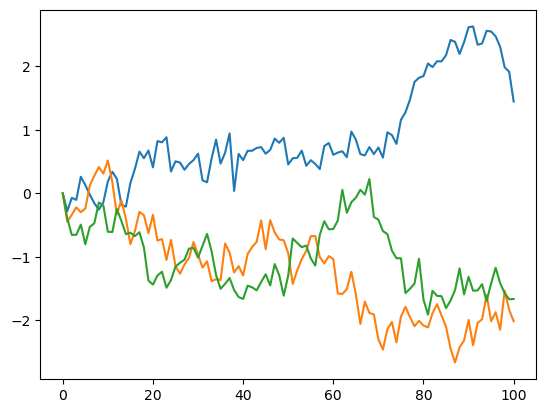

In [102]:
import matplotlib.pyplot as plt
plt.plot(F[0,:])
plt.plot(F[1,:])
plt.plot(F[2,:])

Next we compute the signature of level K_primal for all paths, using the iisignature package.

In [103]:
from helpfunctions import SignatureFull

In [104]:
import numpy as np
tt = np.linspace(0,T,N+1)
S_primal = SignatureFull(tt, dfBm.reshape(5,N,1), K_primal)
S_dual = SignatureFull(tt, dfBm.reshape(5,N,1), K_dual)

The following plot shows some different levels of the signature for one sample.

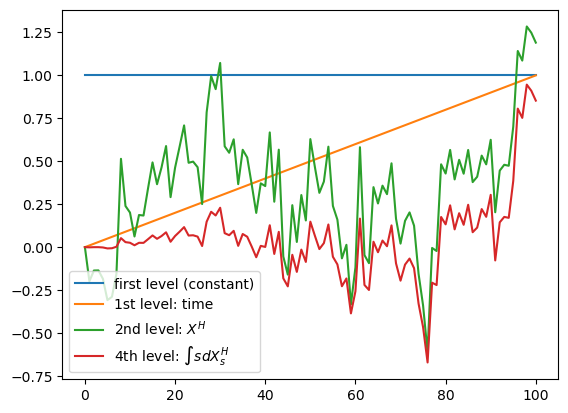

In [105]:
plt.plot(S[0,:,0],label = 'first level (constant)')
plt.plot(S[0,:,1],label = '1st level: time ')
plt.plot(S[0,:,2],label = '2nd level: $X^H$')
plt.plot(S[0,:,4],label = '4th level: $\int sdX^H_s $')
plt.legend()

## Primal signature stopping policies example

Recall that the optimal stopping time for a given sample of the fBM, say $X^{H,(i)}$ for some $i$, is given by $$\tau^{(i)}= \inf\{{t_k: \theta_k(\mathbb{X}_{t_k}^{\leq K,(i)}) \leq X^{(H),i}_{t_k}}\},$$ where $\mathbb{X}^{\leq K,(i)}$ is the signature of $(t,X^{H,(i)}_t)$, and $\theta_k$ are the linear functionals approximating the continuation value, computed in Step 3, that is stopping_policies. We can compute optimal stopping times for all the samples of the fBm

In [75]:
stopping_policies_function = [0]*5 #initalize by final time, if we can note stopp optimally we have to stop at the last time.
subindex = [int((j+1)*J/N) for j in range(N)] #in case J>N, these are the indices of the exercise date in the finer grid.
S_primal_exercise = S_primal[:,subindex,:] #signature at exercise dates only
F_exercise = F[:,subindex] #fBm at exercise dates only
for k in range(5):
    #for each sample, we stop the first time the payoff (here just the fBm value), dominates the linear functional
    j = 0
    while stopping_policies[j].predict(S_primal_exercise[k:k+1,j,:])> F_exercise[k,j]:
        j = j+1
        if j == N-1:
                break
    stopping_policies_function[k] = [0 if x<tt[subindex][j] else 1 for x in tt] 
    
    

For any sample we can now look when the signature stopping policies stops the process

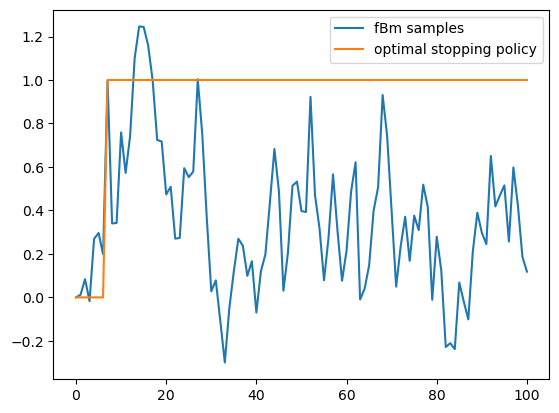

In [77]:
plt.plot(F[0,:],label ='fBm samples')
plt.plot(stopping_policies_function[0],label='optimal stopping policy')
plt.legend()

## Dual optimal martingale example

Recall that the optimal martingale is given by $M^{\theta}_{t_k} = \sum_{j}\theta(\mathbb{X}^{\leq K}_{t_j})(W_{t_{j+1}}-W_{t_j})$, where $\theta$ is the linear functional of the signature we computed in Step 3, i.e. the coefficients $\alpha_i$ such that $\theta(\mathbb{X}_t^{\leq K}) = \sum_j \alpha_j \langle\mathbb{X}^{\leq K}_{t_j},w_j \rangle$. It is an approximation of the dual optimal stopping formulation $$y_0 = \inf_{M}\mathbb{E}(\max_{1\leq k \leq N}(X^H_{t_k}-M_{t_k}))$$ We first computed the familiy of martingales $M=(M^j)$ with $M^j=\int \langle\mathbb{X}^{\leq K}_{t_j},w_j \rangle dW$ using an Euler-Scheme, then using linearity we have $M^{\theta} = \alpha^{\top}M$.

In [85]:
D = len(S[0,0,:]) #number of basis martingales
Martingale_familiy = np.zeros((5,N+1,D))
#recall that dW are the Brownian increments
for d in range(D):
    Martingale_familiy[:,1:N+1,d] = np.cumsum(S[:,0:N,d]*dW,axis=1)

In [90]:
Doob_martingale = np.dot(Martingale_familiy,coefficients)

In the following plot we compare the optimal martingale with the corresponding Brownian motion

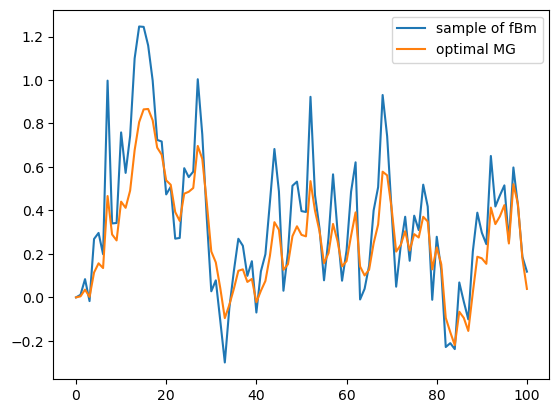

In [92]:
plt.plot(F[0,:],label ='sample of fBm')
plt.plot(Doob_martingale[0,:],label ='optimal MG')
plt.legend()